## COG403 Lab 1

### Part 1: Feedforward Neural Networks [4 pts]

Neural networks provide an output based on a set of inputs, inspired in part by the way our biological neural system learns. Consider the AND Boolean function below.

|$x_1$|$x_2$|out|
|:---:|:---:|:-:|
| 0   | 0   | 0 |
| 0   | 1   | 0 |
| 1   | 0   | 0 |
| 1   | 1   | 1 |

The AND function only outputs a 1 when both inputs are 1s. Let's model the AND function using a simple neural network consisting of one neuron--this is called a **Single Layer Perceptron (SLP)**.

<div>
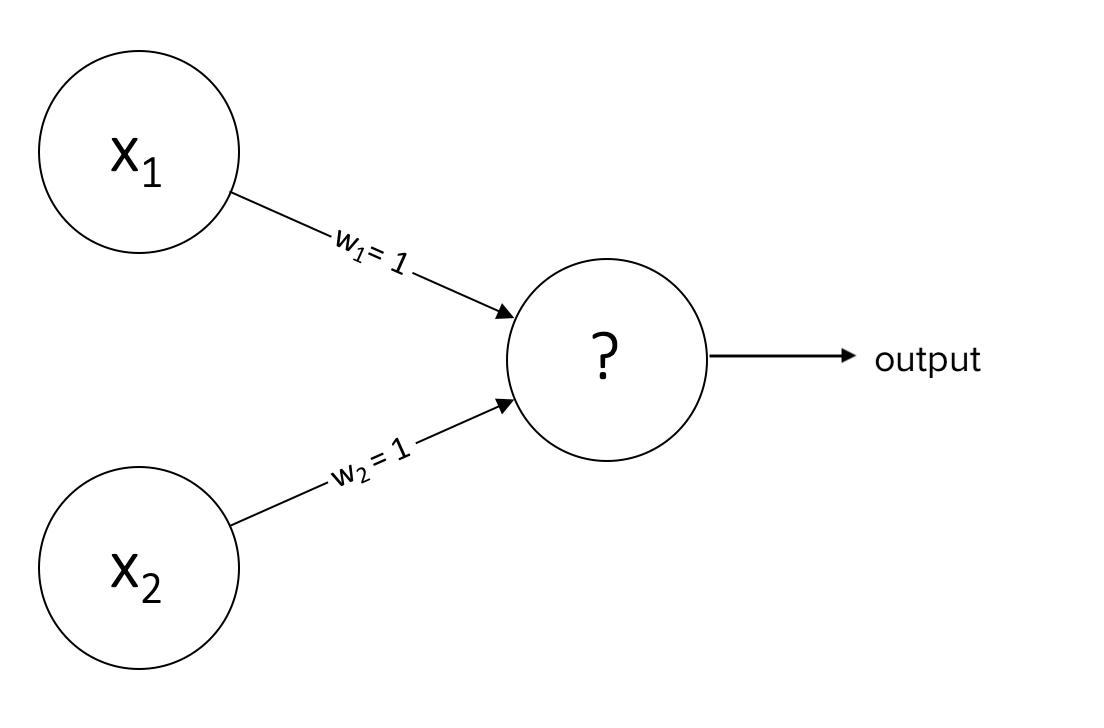
    <p style="text-align: center;"><b>Figure 1</b></p>
</div>


The numbers at the edges indicate the weight each input is multiplied by, which produces a weighted sum of inputs that defines the output. However, we must map this weighted sum to a value of either 0 or 1, which are the only valid outputs from the AND function. 

For this mapping, we use an **activation function** that takes in the weighted sum and produces a binary output (we represent this activation function with the question mark above). You can also think of this activation as a _threshold_ where the weighted sum must reach a certain value in order to 'activate' the neuron and produce an output of 1.

**Q1:** What threshold would you set for the AND function so it produces the expected outputs? **[0.5 point]**


**Q2:** Now set a weight and a threshold for the following neural network of a NOT Boolean function. **[0.5 point]**

<div>
<br>
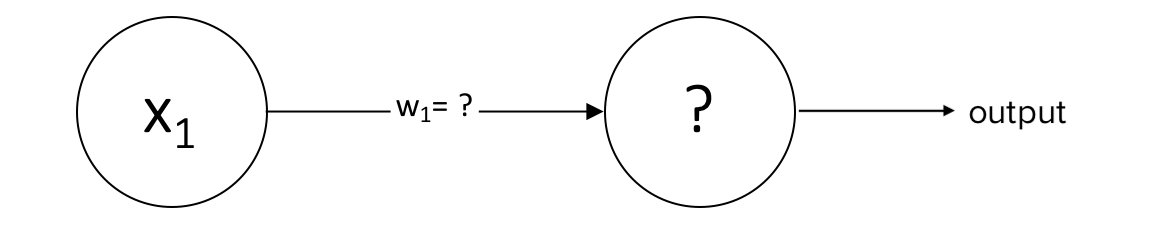
    <p style="text-align: center;"><b>Figure 2</b></p>
</div>

|$x_1$|out|
|:---:|:-:|
| 1   | 0 |
| 0   | 1 |


Now let's consider the XOR Boolean function.

|$x_1$|$x_2$|out|
|:---:|:---:|:-:|
| 0   | 0   | 0 |
| 0   | 1   | 1 |
| 1   | 0   | 1 |
| 1   | 1   | 0 |

Notice there's no threshold that can be set in a SLP that would produce the expected outputs for XOR.

In the following, we've constructed a XOR neural network with another layer in between the input and the output layer--this is called the **hidden** layer. The hidden layer provides an intermediate transformation of the inputs that allows us to produce our desired outputs. Since multiple layers are now involved, this type of neural network is called a **Multilayer Perceptron (MLP)**.

<div>
<br>
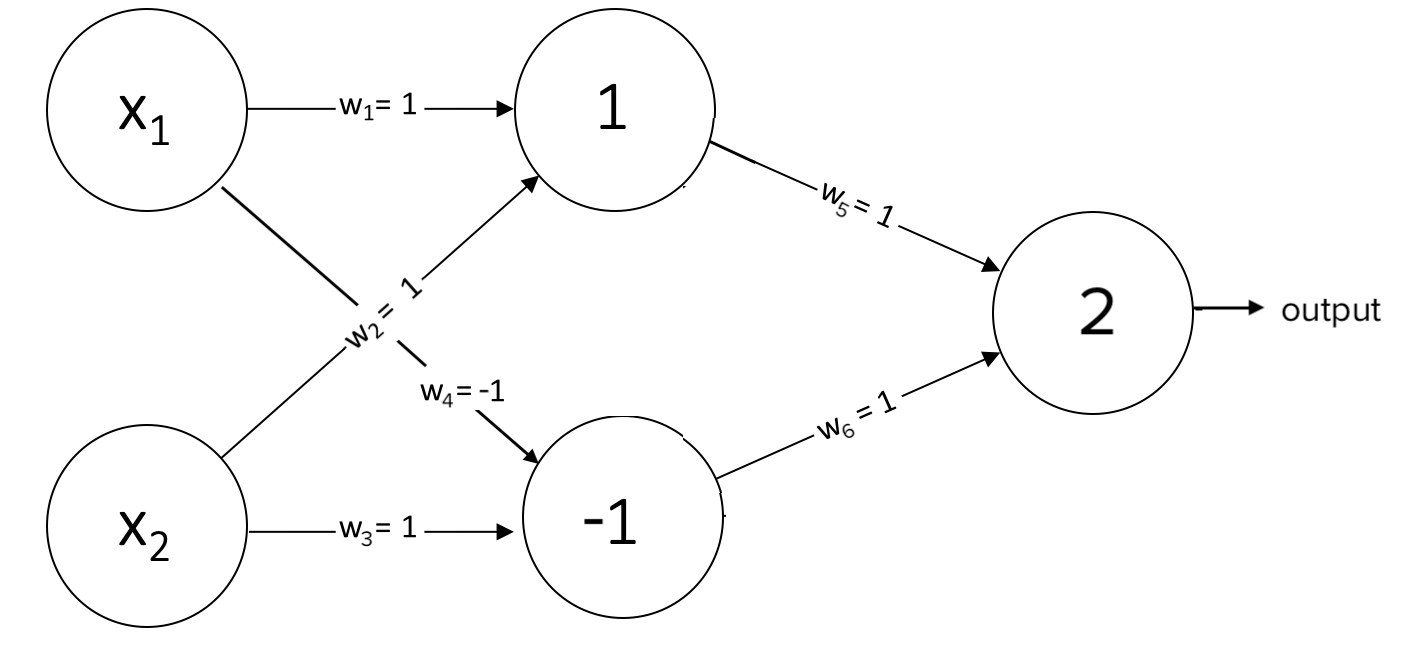
    <p style="text-align: center;"><b>Figure 3</b></p>
</div>

**Q3:** Calculate the outputs for the above network--remember, each input is multiplied by the indicated weights on the edges of the network, and the number indicated in the neuron is the threshold that activates that neuron and produces an output of 1. **[0.5 point]**

For example, using the first set of inputs 0 and 0, the weighted sum fed into the first neuron in the hidden layer is as follows:

$$\begin{align*}
&= x_1 * w_1 + x_2 * w_2 \\
&= 0 * 1 + 0 * 1 \\
&= 0
\end{align*}
$$

To produce the output, notice that the threshold set is 1. Since it isn't met, the output of the first hidden layer neuron is 0. Fill in the rest of the table below.

|$x_1$|$x_2$|out|
|:---:|:---:|:-:|
| 0   | 0   | 0 |
| 0   | 1   | ? |
| 1   | 0   | ? |
| 1   | 1   | ? |

**Q4:** Notice that this does not produce our desired outputs. One of the weights above must be changed to produce our correct outputs. Find which weight and indicate what value it should be changed to. **[0.5 point]**

So far, we have worked with nice whole numbers for our weights and thresholds, which is not the usual case. Neural networks often use real numbers between 0 and 1 for weights, and instead of a specific threshold, the weighted sum uses a specific activation function for mapping the output. A popular activation function is the **sigmoid function**, which 'squashes' outputs to close to 0 and 1.

The equation for the sigmoid function is $\frac{1}{(1+e^{-x})}$. Let's initialize a new XOR neural network.

<div>
<br>
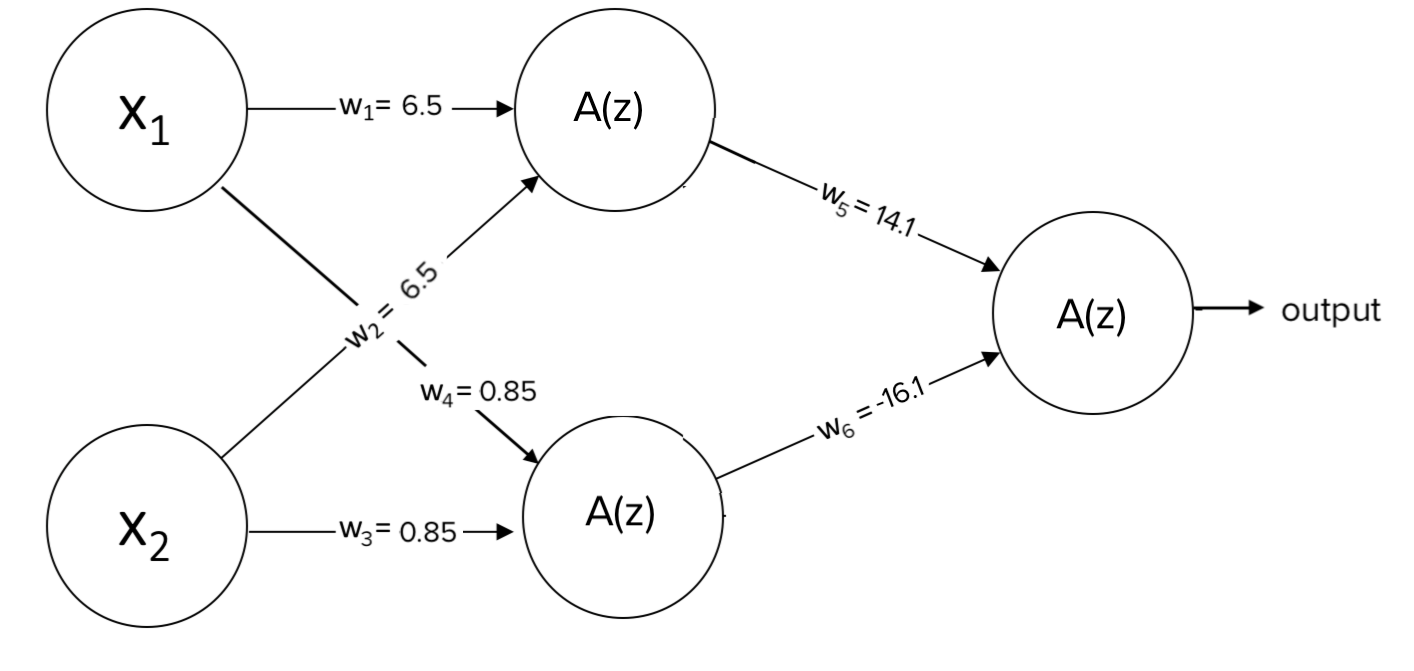
    <p style="text-align: center;"><b>Figure 4</b></p>
</div>

Above, $z$ represents the weighted sum fed into the neuron, while $A(z)$ represents applying the sigmoid function to produce the output of the neuron. 

**Q5:** Perform feedforward on the network above, and report the outputs in the table below. **Hint:** you may write a Python function to perform this. **[1 point]**

|$x_1$|$x_2$|out|
|:---:|:---:|:-:|
| 0   | 0   | ? |
| 0   | 1   | ? |
| 1   | 0   | ? |
| 1   | 1   | ? |

Assume values less than 0.5 are outputted as 0, and values greater than 0.5 as 1. Again, we do not produce our desired outputs with the above weights. $w_6$ needs to be slightly adjusted to obtain our desired weights.

**Q6:** What's a possible alternative weight $w_6$ that can achieve the desired results for XOR? **Hint:** Plot the (mean-squared) error that results from decreasing the value of $w_6$ by 0.1 each time in order to find the optimum output. **[1 point]**

### Part 2A: Matrix Calculations for Feature Mapping [2 pts]

Let's consider a 2 by 2 filter being applied to a 3 by 3 matrix with stride 1, as follows:
$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
0 & 1 \\ 1 & 0 \\ 
\end{matrix}\right] 
*
\mathbf{}\left[\begin{matrix}
0 & 1 & 0\\ 1 & 0 & 1\\ 1 & 1 & 1
\end{matrix}\right] 
\end{equation*}
$$

The calculation for generating a feature map by applying this filter to an input matrix is as follows.

We multiply the filter against a submatrix of the same size within the input matrix, and then sum the results. Starting from the first 2 by 2 submatrix in our input matrix, we would multiply element-wise the following:

$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
0 & 1 \\ 1 & 0 \\ 
\end{matrix}\right] 
*
\mathbf{}\left[\begin{matrix}
0 & 1 \\ 1 & 0 \\ 
\end{matrix}\right] 
=
\mathbf{}\left[\begin{matrix}
0*0 & 1*1 \\ 1*1 & 0*0 \\ 
\end{matrix}\right] 
= 
\mathbf{}\left[\begin{matrix}
0 & 1 \\ 1 & 0 \\ 
\end{matrix}\right] 
\end{equation*}
$$

The calculation would be:
$$\begin{align*}
(0*0)+(1*1)+(0*0)+(1*1) = 2. 
\end{align*}
$$

A stride of 1 means we would shift the filter one column over. We keep doing so until we reach the end of the row, before going row by row until we cover our whole input matrix. Thus, our next application would be:

$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
0 & 1 \\ 1 & 0 \\ 
\end{matrix}\right] 
*
\mathbf{}\left[\begin{matrix}
1 & 0\\ 0 & 1 \\ 
\end{matrix}\right] 
\end{equation*}
$$

**Q1:** Calculate the result of this matrix, and the other two remaining applications of the filter on the matrix. Report the results in a 2 by 2 matrix, where each index reports the result of applying that filter on that quadrant of the matrix. The result should look like below, which is the resulting feature map. **[1 point]**

$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
2 & ? \\ ? & ? \\ 
\end{matrix}\right] 
\end{equation*}
$$

**Q2:** Now consider any $m$ by $m$ filter applied to any $n$ by $n$ matrix. How would you determine the dimensions of the feature map? **[1 point]**

### Part 2B: Convolutional Neural Networks [4 pts]

Let's now apply feature mapping to a subset of digits from the MNIST dataset. Follow the instructions --- you only need to code the "convolve" function and visualize the resulting filtered images; all other code has been written.

In [1]:
#### Helper Functions ####

import gzip
import numpy as np
import matplotlib.pyplot as plt

indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]

def visualize(matrix, grayscale=True):
    """
    Provides a visualization of a given matrix, with grayscale as default.
    """
    vmax = 255 if grayscale else 1
    plt.imshow(matrix, cmap='gray', vmin=0, vmax=vmax)
    
def plot_results(images, grayscale=True):
    """
    Visualizes a set of given images, with grayscale as default.
    """
    fig = plt.figure(figsize=(30, 20))

    for index, val in enumerate(images):
        plt.subplot(1,len(images)+1,index+1)
        visualize(val, grayscale)
    return plt.show()

def load_images():
    """
    Loads a subset of the MNIST dataset consisting of digits from 0-9. Returns a list of nine 28 by 28 matrices,
    one for each digit.
    """
    f = gzip.open('train-images-idx3-ubyte.gz','r')

    image_size = 28
    num_images = int(max(indices)) + 1

    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size, 1)

    image_matrices = []

    for i in indices:
        image = np.asarray(data[int(i)]).squeeze()
        image_matrices.append(image)
    
    return image_matrices

def generate_vertical_filter(dim, col_start=2, col_end=3):
    """
    Generates a vertical filter with dimension dim. col_start and col_end are optional parameters to define
    the width of the vertical white strip.
    """
    row = np.zeros(dim)
    row[col_start:col_end] = 1
    v_filter = np.asarray([row] * dim).squeeze()
    return v_filter
    
def generate_horizontal_filter(dim, row_start=2, row_end=3):
    """
    Generates a horizontal filter with dimension dim. row_start and row_end are optional parameters to define
    the length of the horizontal white strip.
    """
    row = np.zeros(dim)
    h_filter = np.asarray([np.zeros(dim)] * dim).squeeze()
    h_filter[row_start:row_end] = np.array(np.ones(dim))
    return h_filter

def generate_diagonal_filter(dim):
    """
    Generates a diagonal filter with dimension dim.
    """
    d_filter = np.asarray([np.zeros(dim)] * dim).squeeze()

    for i in range(dim):
        d_filter[i][i] = 1
    return d_filter

In [ ]:
# Load and visualize the subset of handwritten digits
image_matrices = load_images()
plot_results(image_matrices)

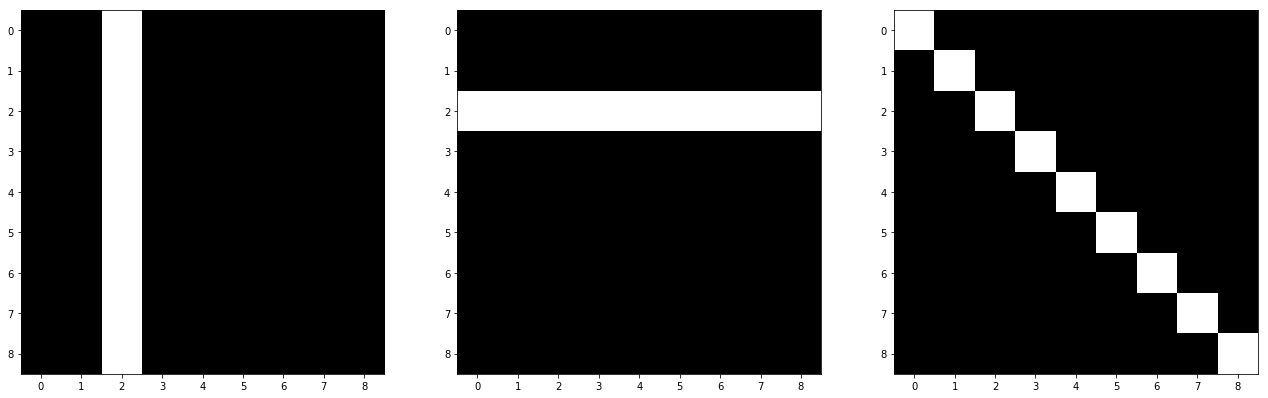

In [37]:
# Define a list consisting of the three types of filters with dimension of 9
filters = [generate_vertical_filter(9), generate_horizontal_filter(9), generate_diagonal_filter(9)]
plot_results(filters, False)

In [1]:
# Define a generic convolve function 
# This returns a feature map after filter F has been applied to input matrix X with stride s
def convolve(X, F, s):
    """
    Performs convolution on an input matrix X by applying filter F with stride s, returning
    the resulting feature map.
    """
    
    # Your code here [3 points]
    
            
    return fm # Return the feature map

    # 0.5 point given if visualized filter results below are all correct

In [1]:
# Plot vertical filter results
# v_filter_results = [convolve(i, filters[0], 1) for i in image_matrices]
# plot_results(v_filter_results)

In [2]:
# Plot horizontal filter results
# h_filter_results = [convolve(i, filters[1], 1) for i in image_matrices]
# plot_results(h_filter_results)

In [3]:
# Plot diagonal filter results
# d_filter_results = [convolve(i, filters[2], 1) for i in image_matrices]
# plot_results(d_filter_results)